<a href="https://colab.research.google.com/github/AkindeKadjo/White_Wine_Quality/blob/main/04_Project2_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

Date: 10/04/22

#Project: White Wine Quality

Data Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

The goal  of the project is to model wine quality based on physicochemical tests

The provided datasets is that of the white vinho verde wine samples, from the north of Portugal. 

In [1]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
#Loading the data
filename = '/content/drive/MyDrive/Coding Dojo/07 Week 7 Classification/winequality-white.csv'
Original_df = pd.read_csv(filename)
# keeping a copy of the df as a safety net
df = Original_df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


A quick check for the data info is done to have an overall idea of the loaded data set

In [3]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#renaming the columns
df = df.rename(columns={'fixed acidity':'fixed_acidity',
                          'volatile acidity':'volatile_acidity',
                          'citric acid':'citric_acid',
                          'residual sugar':'residual_sugar', 
                          'free sulfur dioxide':'free_sulfur_dioxide',
                          'total sulfur dioxide':'total_sulfur_dioxide'})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data Cleaning

##Checking for missing values and duplicates

In [5]:
# how many data points are duplicated?
df.duplicated().sum()

937

In [6]:
#I'll go ahead and drop them and check again to see if there are still duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
#check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Addressing Data Inconcistencies

In [8]:
#checking for significant outliers for the numerical data
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,6.84,0.28,0.33,5.91,0.05,34.89,137.19,0.99,3.20,0.49,10.59,5.85
std,0.87,0.10,0.12,4.86,0.02,17.21,43.13,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


>Scaling the data to remove any outliers

In [9]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.51,-1.94,-2.73,-1.09,-1.60,-1.91,-2.97,-2.30,-3.14,-2.38,-2.13,-3.21
25%,-0.62,-0.68,-0.53,-0.89,-0.47,-0.69,-0.72,-0.75,-0.70,-0.71,-0.90,-0.96
50%,-0.05,-0.20,-0.12,-0.25,-0.17,-0.11,-0.10,-0.10,-0.10,-0.09,-0.16,0.16
75%,0.53,0.48,0.45,0.61,0.18,0.59,0.67,0.66,0.62,0.53,0.67,0.16
max,8.49,7.92,10.83,12.32,12.99,14.77,7.02,15.56,4.12,5.19,2.97,3.53


In [10]:
#Removing outliers with maximum std above 5
df = df[df.fixed_acidity != 14.20]
df = df[df.volatile_acidity != 1.10]
df = df[df.citric_acid != 1.66]
df = df[df.residual_sugar != 65.80]
df = df[df.chlorides != 0.35]
df = df[df.free_sulfur_dioxide != 289]
df = df[df.sulphates != 1.08]
#Removing the density column since there is not much variation
df.drop(columns=['density'], inplace=True)
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00,3955.00
mean,6.84,0.28,0.33,5.90,0.05,34.84,137.12,3.20,0.49,10.59,5.86
std,0.86,0.10,0.12,4.77,0.02,16.73,42.88,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,3.29,0.55,11.40,6.00
max,11.80,1.00,1.23,31.60,0.35,146.50,366.50,3.82,1.06,14.20,9.00


#Assessing the factors affecting the Wine quality

##Countplot

>The Countplot gives us an overview of the distributions of the wine quality in our dataset.

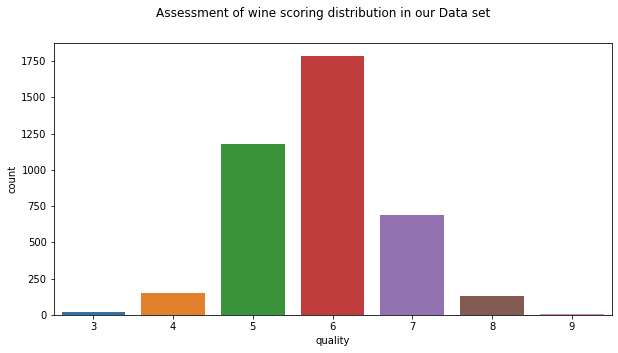

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle('Assessment of wine scoring distribution in our Data set')
sns.countplot( data=df, x='quality');

>The majority of wine in our data set have a quality metric 6 with very few on the lower end of 3 as well as the high end of 9.

##Barplot

>These set of graphs is an indication of how each item correlate to the wine quality. Since the wine quality values were provided in discreet numbers. I decided to group them by their quality metrics.

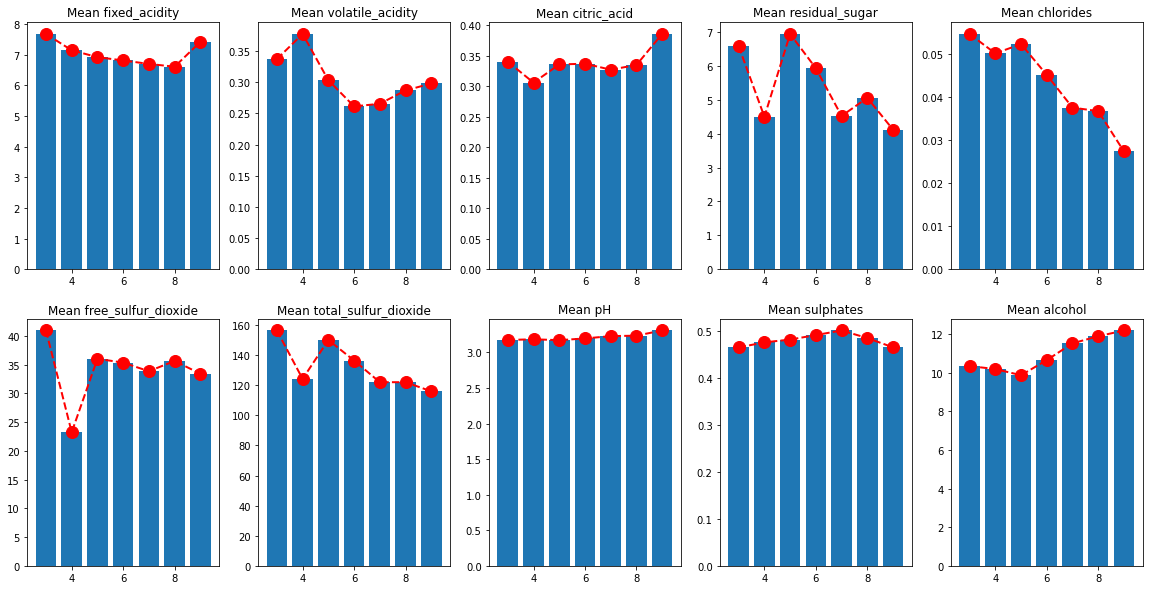

In [27]:
# Group the dataframe by cluster and aggregate by mean values
quality_groups = df.groupby('quality', as_index=False).mean()
# Visualize means 
fig, axes = plt.subplots(2,5, figsize = (20, 10))
# fig is an array of dimensions 2,5.  axes.ravel() will flatten it to 10,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure
for i, col in enumerate(quality_groups.columns[1:]):
  axes[i].bar(quality_groups['quality'], quality_groups[col])
  axes[i].plot(quality_groups['quality'], quality_groups[col],color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
  axes[i].set_title(f'Mean {col}')

>Let's analyze them columns by columns.

>fixed acidity: In general it decreases as the quality increases with the exception of the wine quality of 9. We also need to take in accunt that we have very little sample of wine quality 9.

>volatile acidity, citric acid , residual sugar, free sulfur dioxide : Not much can be derived from them as there are no obvious trends.

>chlorides: it consistently decreases as the quality increases.

>total sulfur dioxide: In general it decreases as the quality increases with the exception of the wine quality of 4.

>pH: it steadly increases with the quality.

>sulphates:  it steadly increases with the quality then drops off after wine quality of 7

>alcohol: it somewhat increases with the quality.
